In [2]:
import os
import gensim
import gensim.corpora as corpora
from functions import remove_stopwords

def model(bodyText,num):
    data = remove_stopwords(bodyText)
    
    id2word = corpora.Dictionary(data)
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in data]
    num_topics = num
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics)
    for idx, topic in lda_model.show_topics(formatted=False):
        return ('{}'.format(' '.join([w[0] for w in topic])))

from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

def topicCloud(topics,title):
    topics = ' '.join(topics)
    words = topics.split(' ')
    word_counts = Counter(words)
    print(word_counts.most_common(100))    
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(word_counts)
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

In [3]:
import re
folder = '/srv/data/VirginiaEPTextClean'
topics = []
group1 = ['A27982', 'A73532', 'A16495', 'B00963', 'A16507', 'A14514', 'A14518', 'A14512', 'A14516', 'A14511', 'A14517', 'A14519', 'A14520', 'A14521', 'A10439', 'A10417', 'A10440', 'A10438', 'A10436', 'A68635', 'A68633', 'A34660', 'A34659', 'A02626', 'A04813', 'A34936', 'A02059', 'A19312', 'A67893', 'A19313']
group0 = ['A11464', 'A11467', 'A34663', 'A80611', 'A80608', 'A80630', 'A80637', 'A34689', 'A34679', 'A34666', 'A13288', 'A13287', 'A13290', 'A19588', 'A19589', 'A19583', 'A19590', 'A17499', 'A69161', 'A19581', 'A02058', 'A15050', 'A01006', 'A01009', 'B13579', 'A01004', 'A01012', 'A01007', 'A06632', 'A01005', 'A01011']
group2 = ['A11472', 'A11474', 'A27888', 'A62166', 'A16552', 'A16457', 'A16527_01', 'A16527_02', 'A16527_03', 'A16527_04', 'A16469', 'A73472', 'A16564', 'A02495']
group3 = ['A80614', 'A69149', 'A34693', 'A80640', 'A80633', 'A34599', 'A80625', 'A80622', 'B20736', 'A34673', 'A34678', 'B20727', 'A71036', 'A84399', 'B20729', 'A80626', 'A80639', 'A34672', 'A80635', 'A34675', 'A80636', 'A34674', 'A34669', 'B07540', 'B07539', 'A01008', 'A01010']

for file in os.listdir(folder):
    name = re.findall('\w{6}',file)[0]
    if name in group1: 
        path = os.path.join(folder,file)
        f = open(path,'r')
        text = f.readlines()
        topicWords = model(text,1)
        # print(file,': ',topicWords)
        print(file)
        topics.append(topicWords)
        f.close()
print('done')

A27982.txt
A73532.txt
A16495.txt
B00963.txt
A16507.txt
A14514.txt
A14518.txt
A14512.txt
A14516.txt
A14511.txt
A14517.txt
A14519.txt
A14520.txt
A14521.txt
A10439.txt
A10417.txt
A10440.txt
A10438.txt
A10436.txt
A68635.txt
A68633.txt
A34660.txt
A34659.txt
A02626.txt
A04813.txt
A34936.txt
A02059.txt
A19312.txt
A67893.txt
A19313.txt
done


[('man', 24), ('good', 15), ('god', 12), ('land', 10), ('country', 8), ('thing', 7), ('people', 6), ('ship', 6), ('virginia', 6), ('new', 5), ('find', 5), ('plantation', 5), ('give', 5), ('action', 4), ('call', 4), ('never', 4), ('love', 3), ('fair', 3), ('death', 3), ('reason', 3), ('person', 3), ('company', 3), ('send', 3), ('court', 3), ('king', 2), ('state', 2), ('ground', 2), ('way', 2), ('purpose', 2), ('thomas', 2), ('lord', 2), ('smith', 2), ('work', 2), ('return', 2), ('son', 2), ('town', 2), ('free', 2), ('indian', 2), ('river', 2), ('live', 2), ('sweet', 1), ('fruit', 1), ('tree', 1), ('appear', 1), ('belove', 1), ('eye', 1), ('delight', 1), ('still', 1), ('world', 1), ('worth', 1), ('grief', 1), ('hart', 1), ('bear', 1), ('end', 1), ('course', 1), ('fleet', 1), ('colony', 1), ('honourable', 1), ('ready', 1), ('settle', 1), ('repair', 1), ('prosperous', 1), ('gardener', 1), ('unnecessary', 1), ('industry', 1), ('sufficient', 1), ('behaviour', 1), ('voyage', 1), ('artificer',

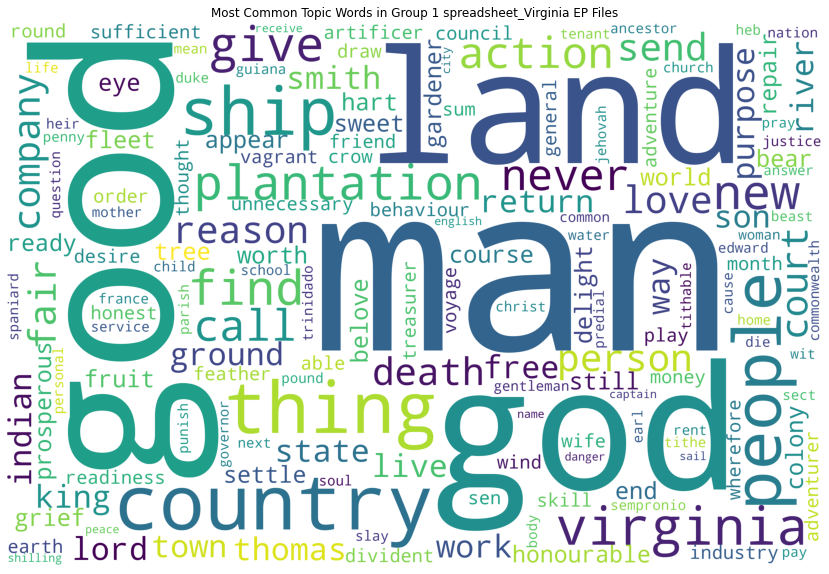

In [4]:
topicCloud(topics,'Most Common Topic Words in Group 1 spreadsheet_Virginia EP Files')